# Importação de Pacotes

In [48]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV, KFold
import joblib
from sklearn.metrics import mean_absolute_percentage_error, make_scorer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import statsmodels.api as sm
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import preprocessing
import pandas as pd
import pingouin as pg
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.model_selection import TimeSeriesSplit, RandomizedSearchCV
from sklearn.metrics import make_scorer, mean_absolute_percentage_error
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import shap
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path


# Importação de dados

In [49]:
try:
    base_path = Path(__file__).parent
except NameError:
    base_path = Path().resolve()  # caminho atual

# Caminho do CSV
csv_path = base_path / "Datasets" / "MICRODADOS_ENEM_2023.csv"

DADOS_ENEM_2023 = pd.read_csv(base_path / "Datasets" / "MICRODADOS_ENEM_2023.csv", sep=";", encoding='ISO-8859-1')

# DADOS_ENEM_2023 = pd.read_csv('C:/Users/helio/OneDrive/Documents/UNB/ARTIGOS_UNB/MICRODADOS_ENEM_2023/DADOS/MICRODADOS_ENEM_2023.csv', sep=";", encoding='ISO-8859-1')

map_dependencia_adm = {
    1: 'Federal',
    2: 'Estadual',
    3: 'Municipal',
    4: 'Privada'
}

# Aplica a substituição no DataFrame
DADOS_ENEM_2023['TP_DEPENDENCIA_ADM_ESC'] = DADOS_ENEM_2023['TP_DEPENDENCIA_ADM_ESC'].replace(map_dependencia_adm)

map_tp_escola = {
    1: 'N_resp',
    2: 'Publica',
    3: 'Privada'
}

# Aplica a substituição no DataFrame
DADOS_ENEM_2023['TP_ESCOLA'] = DADOS_ENEM_2023['TP_ESCOLA'].replace(map_tp_escola)

map_loc_esc = {
    1: 'Urbana',
    2: 'Rural',
}

MAPEAMENTOS = {
    "Q001": { # Escolaridade do aluno
        "A": "Nunca_estudou.",
        "B": "Não completou a 4ª série/5º EF.",
        "C": "Não completou a 8ª série/9º ano do EF.",
        "D": "Não completou o Ensino Médio.",
        "E": "Ensino Medio Completo",
        "F": "Graduação Completa",
        "G": "Pós-graduação completa.",
        "H": "Não sei."
    },
    "Q002": {  # Escolaridade da mãe
        "A": "Nunca estudou.",
        "B": "Não completou a 4ª série/5º EF.",
        "C": "Não completou a 8ª série/9º ano do EF.",
        "D": "Ensino Médio incompleto",
        "E": "Ensino Médio Completo",
        "F": "Graduação completa",
        "G": "Pós-graduação completa.",
        "H": "Não sei."
    },
    "Q003": {  # Número de pessoas morando na casa
        "A": "Moro sozinho(a).",
        "B": "Duas pessoas.",
        "C": "Três pessoas.",
        "D": "Quatro pessoas.",
        "E": "Cinco pessoas.",
        "F": "Seis pessoas.",
        "G": "Sete pessoas.",
        "H": "Oito pessoas ou mais."
    },
    "Q004": {  # Número de banheiros em casa
        "A": "",
        "B": "Um.",
        "C": "Dois.",
        "D": "Três.",
        "E": "Quatro.",
        "F": "Cinco ou mais."
    },
    "Q005": {  # Quantidade de empregados domésticos
        "A": "Nenhum.",
        "B": "Um.",
        "C": "Dois.",
        "D": "Três ou mais."
    },
    "Q006": {  # Renda familiar
        "A": "Nenhuma renda.",
        "B": "Até R$ 1.320,00.",
        "C": "De R$ 1.320,01 até R$ 1.980,00.",
        "D": "De R$ 1.980,01 até R$ 2.640,00.",
        "E": "De R$ 2.640,01 até R$ 3.300,00.",
        "F": "De R$ 3.300,01 até R$ 4.400,00.",
        "G": "De R$ 4.400,01 até R$ 6.600,00.",
        "H": "De R$ 6.600,01 até R$ 8.800,00.",
        "I": "De R$ 8.800,01 até R$ 11.000,00.",
        "J": "De R$ 11.000,01 até R$ 13.200,00.",
        "K": "De R$ 13.200,01 até R$ 16.500,00.",
        "L": "De R$ 16.500,01 até R$ 22.000,00.",
        "M": "Mais de R$ 22.000,00."
    },
    'Q007': {
        'A': 'Nenhuma renda',
        'B': 'Até R$ 998,00',
        'C': 'De R$ 998,01 até R$ 1.497,00',
        'D': 'De R$ 1.497,01 até R$ 1.996,00',
        'E': 'De R$ 1.996,01 até R$ 2.495,00',
        'F': 'De R$ 2.495,01 até R$ 2.994,00',
        'G': 'De R$ 2.994,01 até R$ 3.992,00',
        'H': 'De R$ 3.992,01 até R$ 4.990,00',
        'I': 'De R$ 4.990,01 até R$ 5.988,00',
        'J': 'De R$ 5.988,01 até R$ 6.986,00',
        'K': 'De R$ 6.986,01 até R$ 7.984,00',
        'L': 'De R$ 7.984,01 até R$ 8.982,00',
        'M': 'Acima de R$ 8.982,00',
        'N': 'Não sei'
    },
    'Q008': {
        'A': 'Nenhuma renda',
        'B': 'Até R$ 998,00',
        'C': 'De R$ 998,01 até R$ 1.497,00',
        'D': 'De R$ 1.497,01 até R$ 1.996,00',
        'E': 'De R$ 1.996,01 até R$ 2.495,00',
        'F': 'De R$ 2.495,01 até R$ 2.994,00',
        'G': 'De R$ 2.994,01 até R$ 3.992,00',
        'H': 'De R$ 3.992,01 até R$ 4.990,00',
        'I': 'De R$ 4.990,01 até R$ 5.988,00',
        'J': 'De R$ 5.988,01 até R$ 6.986,00',
        'K': 'De R$ 6.986,01 até R$ 7.984,00',
        'L': 'De R$ 7.984,01 até R$ 8.982,00',
        'M': 'Acima de R$ 8.982,00',
        'N': 'Não sei'
    },
    'Q009': {
        'A': 'Não',
        'B': 'Sim, um',
        'C': 'Sim, dois',
        'D': 'Sim, três ou mais'
    },
    'Q010': {
        'A': 'Não',
        'B': 'Sim, um',
        'C': 'Sim, dois',
        'D': 'Sim, três ou mais'
    },
    'Q011': {
        'A': 'Não',
        'B': 'Sim, um',
        'C': 'Sim, dois',
        'D': 'Sim, três ou mais'
    },
    'Q012': {
        'A': 'Não',
        'B': 'Sim, um',
        'C': 'Sim, dois',
        'D': 'Sim, três ou mais'
    },
    'Q013': {
        'A': 'Não',
        'B': 'Sim, um',
        'C': 'Sim, dois',
        'D': 'Sim, três ou mais'
    },
    'Q014': {
        'A': 'Não',
        'B': 'Sim, um',
        'C': 'Sim, dois',
        'D': 'Sim, três ou mais'
    },
    'Q015': {
        'A': 'Não',
        'B': 'Sim, um',
        'C': 'Sim, dois',
        'D': 'Sim, três ou mais'
    },
    'Q016': {
        'A': 'Não',
        'B': 'Sim, um',
        'C': 'Sim, dois',
        'D': 'Sim, três ou mais'
    },
    'Q017': {
        'A': 'Não possui',
        'B': '1',
        'C': '2',
        'D': '3',
        'E': '4',
        'F': '5',
        'G': '6 ou mais'
    },
    'Q018': {
        'A': 'Não',
        'B': 'Sim',

    },
    'Q019': {
        'A': 'Não',
        'B': 'Uma',
        'C': 'Duas',
        'D': 'Três',
        'E': 'Quatro ou mais'},
        
    'Q020': {
        'A': 'Não',
        'B': 'Sim'
    },

    'Q021': {
        'A': 'Não',
        'B': 'Sim'
    },

    'Q022': {
        'A': 'Não',
        'B': 'Uma',
        'C': 'Duas',
        'D': 'Três',
        'E': 'Quatro ou mais'},

    'Q023': {
        'A': 'Não',
        'B': 'Sim'
    },

    'Q024': {
        'A': 'Não',
        'B': 'Uma',
        'C': 'Duas',
        'D': 'Três',
        'E': 'Quatro ou mais'},

'Q025': {
        'A': 'Não',
        'B': 'Uma'},

}


# Aplica a substituição no DataFrame
DADOS_ENEM_2023['TP_LOCALIZACAO_ESC'] = DADOS_ENEM_2023['TP_LOCALIZACAO_ESC'].replace(map_loc_esc)
DADOS_ENEM_2023['Q001'] = DADOS_ENEM_2023['Q001'].replace(MAPEAMENTOS['Q001'])
DADOS_ENEM_2023['Q002'] = DADOS_ENEM_2023['Q002'].replace(MAPEAMENTOS['Q002'])
DADOS_ENEM_2023['Q003'] = DADOS_ENEM_2023['Q003'].replace(MAPEAMENTOS['Q003'])
DADOS_ENEM_2023['Q004'] = DADOS_ENEM_2023['Q004'].replace(MAPEAMENTOS['Q004'])
DADOS_ENEM_2023['Q005'] = DADOS_ENEM_2023['Q005'].replace(MAPEAMENTOS['Q005'])
DADOS_ENEM_2023['Q006'] = DADOS_ENEM_2023['Q006'].replace(MAPEAMENTOS['Q006'])
DADOS_ENEM_2023['Q007'] = DADOS_ENEM_2023['Q007'].replace(MAPEAMENTOS['Q007'])
DADOS_ENEM_2023['Q008'] = DADOS_ENEM_2023['Q008'].replace(MAPEAMENTOS['Q008'])
DADOS_ENEM_2023['Q009'] = DADOS_ENEM_2023['Q009'].replace(MAPEAMENTOS['Q009'])
DADOS_ENEM_2023['Q010'] = DADOS_ENEM_2023['Q010'].replace(MAPEAMENTOS['Q010'])
DADOS_ENEM_2023['Q011'] = DADOS_ENEM_2023['Q011'].replace(MAPEAMENTOS['Q011'])
DADOS_ENEM_2023['Q012'] = DADOS_ENEM_2023['Q012'].replace(MAPEAMENTOS['Q012'])
DADOS_ENEM_2023['Q013'] = DADOS_ENEM_2023['Q013'].replace(MAPEAMENTOS['Q013'])
DADOS_ENEM_2023['Q014'] = DADOS_ENEM_2023['Q014'].replace(MAPEAMENTOS['Q014'])
DADOS_ENEM_2023['Q015'] = DADOS_ENEM_2023['Q015'].replace(MAPEAMENTOS['Q015'])
DADOS_ENEM_2023['Q016'] = DADOS_ENEM_2023['Q016'].replace(MAPEAMENTOS['Q016'])
DADOS_ENEM_2023['Q017'] = DADOS_ENEM_2023['Q017'].replace(MAPEAMENTOS['Q017'])
DADOS_ENEM_2023['Q018'] = DADOS_ENEM_2023['Q018'].replace(MAPEAMENTOS['Q018'])
DADOS_ENEM_2023['Q019'] = DADOS_ENEM_2023['Q019'].replace(MAPEAMENTOS['Q019'])
DADOS_ENEM_2023['Q020'] = DADOS_ENEM_2023['Q020'].replace(MAPEAMENTOS['Q020'])
DADOS_ENEM_2023['Q021'] = DADOS_ENEM_2023['Q021'].replace(MAPEAMENTOS['Q021'])
DADOS_ENEM_2023['Q022'] = DADOS_ENEM_2023['Q022'].replace(MAPEAMENTOS['Q022'])
DADOS_ENEM_2023['Q023'] = DADOS_ENEM_2023['Q023'].replace(MAPEAMENTOS['Q023'])
DADOS_ENEM_2023['Q024'] = DADOS_ENEM_2023['Q024'].replace(MAPEAMENTOS['Q024'])




In [50]:
DADOS_ENEM_2023 = DADOS_ENEM_2023.rename(columns={
    'Q001': 'escolaridade_pai',
    'Q002': 'escolaridade_mae',
    'Q003': 'ocupacao_pai',
    'Q004': 'ocupacao_mae',
    'Q005': 'moradores_residencia',
    'Q006': 'renda_familiar',
    'Q007': 'tem_empregado_domestico',
    'Q008': 'tem_banheiro',
    'Q009': 'tem_quartos',
    'Q010': 'tem_carro',
    'Q011': 'tem_motocicleta',
    'Q012': 'tem_geladeira',
    'Q013': 'tem_freezer',
    'Q014': 'tem_maquina_lavar_roupa',
    'Q015': 'tem_maquina_secar_roupa',
    'Q016': 'tem_microondas',
    'Q017': 'tem_maquina_lavar_louca',
    'Q018': 'tem_aspirador_po',
    'Q019': 'tem_tv_cores',
    'Q020': 'tem_dvd',
    'Q021': 'tem_tv_assinatura',
    'Q022': 'tem_celular',
    'Q023': 'tem_telefone_fixo',
    'Q024': 'tem_computador',
    'Q025': 'tem_internet'
})


In [51]:
IDEB_2023 = pd.read_excel(base_path / "Datasets" /"Renda_per_capita_educação.xlsx", sheet_name = 'IDEB_ENSINO_MEDIO', skiprows = 8)
IDEB_2023_GO = IDEB_2023[ (IDEB_2023["Rede"] == "Pública") &
(IDEB_2023["Sigla da UF"] == "GO")]

COLUNAS_SELECIONADAS = ['codigo', 'Nome do Município', 'IDEB_2023']

IDEB_2023_GO = IDEB_2023_GO[COLUNAS_SELECIONADAS]

RENDA_GO = pd.read_excel(base_path / "Datasets" /"Renda_per_capita_educação.xlsx", sheet_name = 'RENDA_PER_CAPITA')
COLUNAS_SELECIONADAS = ['codigo', 'ano_2021']
RENDA_GO = RENDA_GO[COLUNAS_SELECIONADAS]

IDMH_GO = pd.read_excel('C:/Users/helio/OneDrive/Documents/UNB/ARTIGOS_UNB/MICRODADOS_ENEM_2023/DADOS/Renda_per_capita_educação.xlsx', sheet_name = 'IDHM_2021')
COLUNAS_SELECIONADAS = ['codigo', 'IDHM']
IDMH_GO = IDMH_GO[COLUNAS_SELECIONADAS]

GO_merged = pd.merge(IDEB_2023_GO, RENDA_GO, on='codigo', how='inner')

# Segundo merge: resultado anterior + IDMH
GO_merged = pd.merge(GO_merged, IDMH_GO, on='codigo', how='inner')
GO_merged = GO_merged.rename(columns={'codigo': 'CO_MUNICIPIO_ESC'})


In [52]:
PARTIC_ENEM_2023_GO = DADOS_ENEM_2023[
    (DADOS_ENEM_2023["TP_PRESENCA_CN"] == 1) & 
    (DADOS_ENEM_2023["TP_PRESENCA_CH"] == 1) & 
    (DADOS_ENEM_2023["TP_PRESENCA_LC"] == 1) & 
    (DADOS_ENEM_2023["TP_PRESENCA_MT"] == 1) & 
    (DADOS_ENEM_2023["SG_UF_ESC"] == "GO") &
    (DADOS_ENEM_2023["NU_NOTA_CN"] > 1) & 
    (DADOS_ENEM_2023["NU_NOTA_CH"] > 1) & 
    (DADOS_ENEM_2023["NU_NOTA_MT"] > 1) & 
    (DADOS_ENEM_2023["NU_NOTA_LC"] > 1) &
    (DADOS_ENEM_2023["TP_ENSINO"] == 1) 
]

PARTIC_ENEM_2023_GO = pd.merge(PARTIC_ENEM_2023_GO, GO_merged, on='CO_MUNICIPIO_ESC', how='inner')

In [53]:
REG_ENEM_2023_GO = PARTIC_ENEM_2023_GO[
    [
        'TP_SEXO', 'TP_NACIONALIDADE', 'TP_COR_RACA', 'TP_ESTADO_CIVIL', 'TP_DEPENDENCIA_ADM_ESC', 'TP_FAIXA_ETARIA',
        'TP_LOCALIZACAO_ESC', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO',
        'escolaridade_pai', 'escolaridade_mae', 'ocupacao_pai', 'ocupacao_mae', 'moradores_residencia', 'renda_familiar',
        'tem_empregado_domestico', 'tem_banheiro', 'tem_quartos', 'tem_carro', 'tem_motocicleta', 'tem_geladeira',
        'tem_freezer', 'tem_maquina_lavar_roupa', 'tem_maquina_secar_roupa', 'tem_microondas', 'tem_maquina_lavar_louca',
        'tem_aspirador_po', 'tem_tv_cores', 'tem_dvd', 'tem_tv_assinatura', 'tem_celular', 'tem_telefone_fixo',
        'tem_computador', 'tem_internet', 'IDEB_2023', 'IDHM'
    ]
]

categorical_columns = [
    'TP_SEXO', 'TP_NACIONALIDADE', 'TP_COR_RACA', 'TP_ESTADO_CIVIL', 'TP_DEPENDENCIA_ADM_ESC', 'TP_FAIXA_ETARIA',
    'TP_LOCALIZACAO_ESC', 'escolaridade_pai', 'escolaridade_mae', 'ocupacao_pai', 'ocupacao_mae', 'renda_familiar',
    'tem_empregado_domestico', 'tem_banheiro', 'tem_quartos', 'tem_carro', 'tem_motocicleta', 'tem_geladeira',
    'tem_freezer', 'tem_maquina_lavar_roupa', 'tem_maquina_secar_roupa', 'tem_microondas', 'tem_maquina_lavar_louca',
    'tem_aspirador_po', 'tem_tv_cores', 'tem_dvd', 'tem_tv_assinatura', 'tem_celular', 'tem_telefone_fixo',
    'tem_computador', 'tem_internet'
]


# No âmbito do GO, as variáveis 'TP_ANO_CONCLUIU', 'TP_ST_CONCLUSAO' apresentaram como valores as contanstes 0 e 2. Assim, não participarão do modelo. A vari[avel 
#CO_MUNICIPIO_ESC não foi considerada nesta avaliação inicialmente. 
#

In [54]:
# Teste de Levene e ANOVA
# Calcular média das notas e status
REG_ENEM_2023_GO['MEDIA_RESULTADO'] = (
    (REG_ENEM_2023_GO['NU_NOTA_CN'] + 
     REG_ENEM_2023_GO['NU_NOTA_CH'] + 
     REG_ENEM_2023_GO['NU_NOTA_LC'] + 
     REG_ENEM_2023_GO['NU_NOTA_MT'] + 
     REG_ENEM_2023_GO['NU_NOTA_REDACAO']) / 5
)

C:\Users\helio\AppData\Local\Temp\ipykernel_13816\3984227860.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  REG_ENEM_2023_GO['MEDIA_RESULTADO'] = (


In [55]:
REG_ENEM_2023_GO = pd.get_dummies(REG_ENEM_2023_GO, columns=categorical_columns, prefix=categorical_columns)
# Definir X e y
X_GO = REG_ENEM_2023_GO.drop(columns=['MEDIA_RESULTADO', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO'])
y_GO = REG_ENEM_2023_GO['MEDIA_RESULTADO']

# Resamplear usando SMOTE
#smt = SMOTE()
#X_GO, y_GO = smt.fit_resample(X_GO, y_GO)

print(REG_ENEM_2023_GO.shape)
print(X_GO.shape)

(27109, 174)
(27109, 168)


# Construção Modelo

In [56]:
variaveis = 8

selector = SelectKBest(score_func=mutual_info_regression, k=variaveis)
selector.fit(X_GO, y_GO)

cols = selector.get_support(indices=True)
selected_columns = X_GO.columns[cols].tolist()
scores = selector.scores_[cols]

# Atualizar X_GO e criar GO de scores
X_GO = X_GO[selected_columns]
scores_GO = pd.DataFrame({'Variáveis': selected_columns, 'Scores': scores})
scores_GO['REL'] = scores_GO['Scores'] / np.sum(scores_GO['Scores'])

# Plot opcional
scores_GO.set_index('Variáveis')['Scores'].plot(kind='bar', figsize=(10, 5), title='Importância das Variáveis Selecionadas')
plt.savefig("imagens/feature_importance.png", dpi=300, bbox_inches="tight")
plt.close()


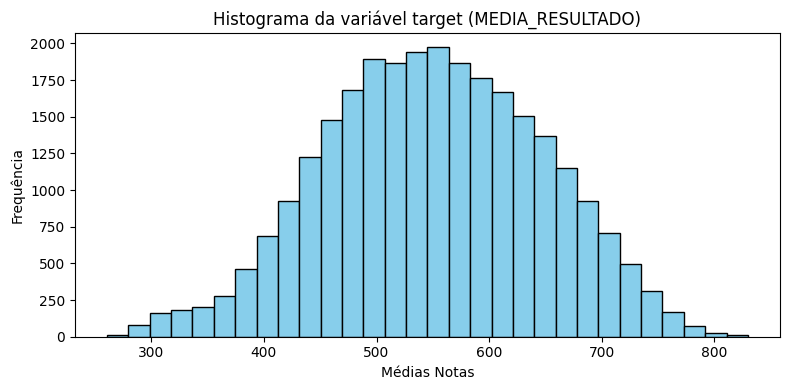

In [57]:
# Histograma da variável target
plt.figure(figsize=(8, 4))
plt.hist(y_GO, bins=30, color='skyblue', edgecolor='black')
plt.title('Histograma da variável target (MEDIA_RESULTADO)')
plt.xlabel('Médias Notas')
plt.ylabel('Frequência')
plt.tight_layout()
plt.savefig("imagens/analise_descritiva/histograma.jpg", dpi=300, bbox_inches="tight")
plt.show()

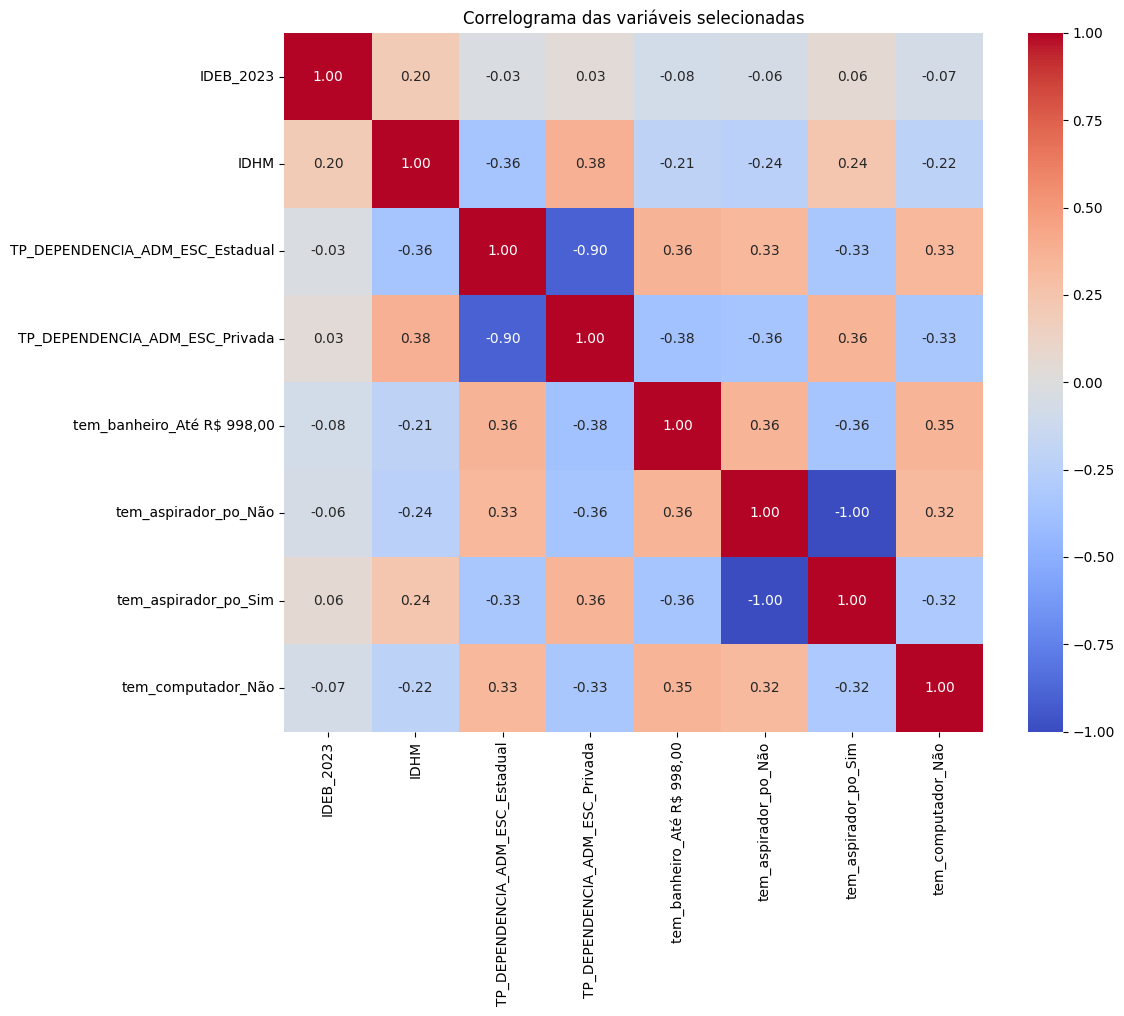

In [58]:
plt.figure(figsize=(12, 10))
corr = X_GO.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlograma das variáveis selecionadas')
plt.tight_layout()
plt.savefig("imagens/analise_descritiva/correlograma.jpg", dpi=300, bbox_inches="tight")
plt.show()

In [59]:
# Separar treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X_GO, y_GO, test_size=0.20, random_state=42
)

# Exibir resultados
print("Shape dos dados de treino:", X_train.shape)
print("Variáveis selecionadas:", selected_columns)

Shape dos dados de treino: (21687, 8)
Variáveis selecionadas: ['IDEB_2023', 'IDHM', 'TP_DEPENDENCIA_ADM_ESC_Estadual', 'TP_DEPENDENCIA_ADM_ESC_Privada', 'tem_banheiro_Até R$ 998,00', 'tem_aspirador_po_Não', 'tem_aspirador_po_Sim', 'tem_computador_Não']


In [60]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

splits = 50

# Parâmetros de busca para XGBoost
param_grid_xgb = {
    'max_depth': np.arange(1, 21, step = 2), # Profundidade da árvore
    'learning_rate': np.arange(0.01, 0.08 ,step = 0.02),  # Taxa de aprendizado
    'n_estimators': np.arange(20, 100, step = 10),  # Número de árvores
    'subsample': np.arange(0.1, 0.8, step = 0.2),      # Fração de amostras usadas para cada árvore
    'colsample_bytree': np.arange(0.1, 0.7, step = 0.2),    # Fração de colunas usadas por árvore
    'gamma': np.arange(0.1, 0.6, step = 0.2),          # Regularização (evita overfitting)
    'reg_lambda': np.arange(0.1, 1, step = 0.2),       # Regularização L2
    'min_child_weight': np.arange(1, 10, step = 2)    # Peso mínimo para divisão de nós
}

# Validação cruzada
kf = KFold(n_splits=splits, shuffle=True, random_state=42)

# Scorer
scorer = make_scorer(mean_absolute_percentage_error, greater_is_better=False)
xgb_model = xgb.XGBRegressor(random_state=42)
random_search_xgb = RandomizedSearchCV(xgb_model, param_distributions=param_grid_xgb, cv=kf, scoring=scorer, n_jobs=-1, n_iter=20, random_state=42)

random_search_xgb.fit(X_train, y_train)

# Melhor modelo encontrado
melhor_modelo_xgb = random_search_xgb.best_estimator_

# Previsão
y_pred = melhor_modelo_xgb.predict(X_test)

# Avaliação
r2_xgb = r2_score(y_test, y_pred)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred))
mae_xgb = mean_absolute_error(y_test, y_pred)
mape_xgb = mean_absolute_percentage_error(y_test, y_pred)

metricas_resultados = pd.DataFrame({
    'Métrica': ['R²', 'RMSE', 'MAE', 'MAPE'],
    'Valor': [r2_xgb, rmse_xgb, mae_xgb, mape_xgb]
})

metricas_resultados['Valor'] = metricas_resultados['Valor'].apply(lambda x: f"{x:.4f}" if abs(x) < 1 else f"{x:,.4f}")
metricas_resultados.loc[metricas_resultados['Métrica'] == 'MAPE', 'Valor'] = metricas_resultados.loc[metricas_resultados['Métrica'] == 'MAPE', 'Valor'] + " %"

# Salvar como Excel
caminho_arquivo = "Tabelas/metricas_modelo_xgb.xlsx"
metricas_resultados.to_excel(caminho_arquivo, index=False)

# Resultados
print("Melhores parâmetros encontrados:")
print(random_search_xgb.best_params_)

Melhores parâmetros encontrados:
{'subsample': 0.30000000000000004, 'reg_lambda': 0.5000000000000001, 'n_estimators': 50, 'min_child_weight': 9, 'max_depth': 11, 'learning_rate': 0.06999999999999999, 'gamma': 0.30000000000000004, 'colsample_bytree': 0.5000000000000001}


In [61]:
# Avaliação no teste
resultados = pd.DataFrame({'Real': y_test, 'Previsto': y_pred})
resultados['DIF_ABS'] = np.abs(resultados['Real'] - resultados['Previsto'])
resultados['DIF_REL'] = np.abs(resultados['DIF_ABS'] / resultados['Real'])
resultados

,Real,Previsto,DIF_ABS,DIF_REL
3639,511.98,551.657715,39.677715,0.077499
8214,486.50,519.740845,33.240845,0.068327
10166,510.02,514.065369,4.045369,0.007932
20573,509.44,553.452209,44.012209,0.086393
4684,562.76,561.996399,0.763601,0.001357
...,...,...,...,...
6325,651.18,631.824402,19.355598,0.029724
13252,515.80,543.904236,28.104236,0.054487
3702,665.16,656.224060,8.935940,0.013434
14950,584.12,484.203186,99.916814,0.171055


In [62]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

axes[0].hist(resultados['Previsto'], bins=20, color='blue', alpha=0.7)
axes[0].set_title('Previsto')
axes[0].set_xlabel('Notas')
axes[0].set_ylabel('Frequência')

axes[1].hist(resultados['Real'], bins=20, color='green', alpha=0.7)
axes[1].set_title('Real')
axes[1].set_xlabel('Notas')

fig.suptitle("Distribuição das Notas - Previsto vs Real", fontsize=14)
plt.savefig("imagens/histograma_notas_projetadas.png", dpi=300, bbox_inches="tight")
plt.close()

In [63]:
# Criar o gráfico de regressão
plt.figure(figsize=(8,6))
sns.regplot(x=y_test, y=y_pred, line_kws={"color": "red"})
plt.xlabel('Valores reais')
plt.ylabel('Valores previstos')
plt.title('Valores previstos X reais')
plt.grid(True)
plt.savefig("imagens/Valores_previstos_valores_reais.png", dpi=300, bbox_inches="tight")
plt.close()


In [64]:
rmse_scorer = make_scorer(mean_squared_error, squared=False)  # RMSE minimiza erro
cv_resultados = cross_val_score(melhor_modelo_xgb, X_train, y_train, cv=splits, scoring=rmse_scorer, n_jobs=-1)
cv_GO = pd.DataFrame({'Fold': np.arange(1, splits+1), 'RMSE': cv_resultados})

In [65]:
# Criar vetor de iterações
iteracoes = range(1, len(cv_resultados) + 1)

plt.figure(figsize=(8, 6))

# Plotar apenas os RMSEs da validação cruzada
plt.plot(iteracoes, cv_resultados, marker='o', linestyle='-', label='RMSE Teste')

# Configurações do gráfico
plt.title('RMSE ao longo dos Folds')
plt.xlabel('Número de Folds')
plt.ylabel('RMSE')
plt.legend()
plt.grid(True)
plt.savefig("imagens/RMSE_Folds.png", dpi=300, bbox_inches="tight")
plt.close()


In [66]:
# Garante que y_test está em formato DataFrame
GO_y_test = pd.DataFrame(y_test, columns=['MEDIA_RESULTADO']).reset_index(drop=True)

# Extrai os valores previstos do DataFrame 'resultados'
GO_predictions_teste = pd.DataFrame(resultados['Previsto'].values, columns=['y_previsto']).reset_index(drop=True)

# Concatena previsões e valores reais
previsao_modelo_2 = pd.concat([GO_predictions_teste, GO_y_test], axis=1)

# Calcula o erro absoluto e relativo
previsao_modelo_2['ERRO'] = np.abs(previsao_modelo_2['y_previsto'] - previsao_modelo_2['MEDIA_RESULTADO'])
previsao_modelo_2['ERRO_REL'] = np.abs(previsao_modelo_2['ERRO'] / previsao_modelo_2['MEDIA_RESULTADO'])

# Exibe as 15 previsões com menor erro relativo
previsao_modelo_2.sort_values(by='ERRO_REL', ascending=False).head(10)

,y_previsto,MEDIA_RESULTADO,ERRO,ERRO_REL
1172,580.522461,300.12,280.402461,0.934301
5043,561.996399,294.86,267.136399,0.905977
1008,513.962219,271.00,242.962219,0.896540
5111,551.657715,292.52,259.137715,0.885880
2005,556.311096,296.18,260.131096,0.878287
1087,656.224060,352.20,304.024060,0.863214
3311,529.182495,284.36,244.822495,0.860960
2315,529.182495,285.30,243.882495,0.854828
4517,542.192261,293.20,248.992261,0.849223
689,535.394836,293.76,241.634836,0.822559


In [67]:
MAE_MODELO_2 = sum(previsao_modelo_2['ERRO'])/len(previsao_modelo_2['ERRO'])
MAPE_MODELO_2 = np.mean(previsao_modelo_2['ERRO_REL'])

print(MAE_MODELO_2)
print(MAPE_MODELO_2)

64.24482201283901
0.1245523003435904


In [68]:
# Definir os intervalos de erro
bins = [0, 0.1, 0.3, 0.5, 0.7, float('inf')]
labels = ['Erro entre 0% e 10%', 'Erro entre 10% e 30%', 'Erro entre 30% e 50%', 'Erro entre 50% e 70%', 'Acima de 70%']

# Categorizar os dados
previsao_modelo_2['Intervalo_ERRO_REL'] = pd.cut(previsao_modelo_2['ERRO_REL'], bins=bins, labels=labels)

# Construir a tabela de distribuição de frequência
frequencia = previsao_modelo_2['Intervalo_ERRO_REL'].value_counts().sort_index()

# Exibir a tabela de distribuição de frequência
tabela_frequencia = pd.DataFrame({'Intervalo de Erro Relativo': labels, 'Frequência': frequencia})
tabela_frequencia['FREQ_REL'] = tabela_frequencia['Frequência']/sum(tabela_frequencia['Frequência'])
tabela_frequencia

,Intervalo de Erro Relativo,Frequência,FREQ_REL
Intervalo_ERRO_REL,,,
Erro entre 0% e 10%,Erro entre 0% e 10%,2753,0.507746
Erro entre 10% e 30%,Erro entre 10% e 30%,2310,0.426042
Erro entre 30% e 50%,Erro entre 30% e 50%,258,0.047584
Erro entre 50% e 70%,Erro entre 50% e 70%,77,0.014201
Acima de 70%,Acima de 70%,24,0.004426


In [69]:
# Definir os intervalos de erro
bins = [0, 50, 100, 150, 200, float('inf')]
labels = ['Erro entre 0 e 50 pontos', 'Erro entre 50 e 100 pontos', 'Erro entre 100 e 150 pontos', 'Erro entre 150 e 200 pontos', 'Acima de 200 pontos']

# Categorizar os dados
previsao_modelo_2['Intervalo_ERRO'] = pd.cut(previsao_modelo_2['ERRO'], bins=bins, labels=labels)

# Construir a tabela de distribuição de frequência
frequencia_abs = previsao_modelo_2['Intervalo_ERRO'].value_counts().sort_index()

# Exibir a tabela de distribuição de frequência
tabela_frequencia_abs = pd.DataFrame({'Intervalo de Erro': labels, 'Frequência': frequencia_abs})
tabela_frequencia['FREQ_ABS'] = tabela_frequencia_abs['Frequência']/sum(tabela_frequencia['Frequência'])
tabela_frequencia_abs

,Intervalo de Erro,Frequência
Intervalo_ERRO,,
Erro entre 0 e 50 pontos,Erro entre 0 e 50 pontos,2493
Erro entre 50 e 100 pontos,Erro entre 50 e 100 pontos,1785
Erro entre 100 e 150 pontos,Erro entre 100 e 150 pontos,811
Erro entre 150 e 200 pontos,Erro entre 150 e 200 pontos,256
Acima de 200 pontos,Acima de 200 pontos,77


In [70]:
# Supondo que y_pred e y_test já estão definidos
plt.scatter(previsao_modelo_2['MEDIA_RESULTADO'], previsao_modelo_2['y_previsto'] - previsao_modelo_2['MEDIA_RESULTADO'], c='limegreen', label='Base de Teste')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Previsões')
plt.ylabel('Resíduos')
plt.legend()
plt.savefig("imagens/residuos_projeção.png", dpi=300, bbox_inches="tight")
plt.close()

#GO_predictions_teste = pd.DataFrame(predictions_teste, columns=['y_previsto'])

# Shapley Values

In [71]:
#explainer = shap.Explainer(model, X_train)

#shap_values = explainer(X_test)

explainer = shap.Explainer(melhor_modelo_xgb)

shap_values = explainer.shap_values(X_test)

In [72]:
print("Variable Importance Plot - Global Interpretation")
plt.figure()
shap.summary_plot(shap_values, X_test, show=False)
plt.savefig("imagens/summary_plot.png", dpi=300, bbox_inches="tight")
plt.close()


Variable Importance Plot - Global Interpretation


In [73]:
# Calcula os valores shap no conjunto de teste
shap_values = explainer(X_test)

# Agora shap_values é um objeto Explanation — e o gráfico funciona:
shap.plots.bar(shap_values, show=False)
plt.savefig("imagens/global_plot.png", dpi=300, bbox_inches="tight")
plt.close()
#shap.plots.bar(cb_shap, max_display=15)

In [74]:
yr_cohort = np.where(
X_test.TP_DEPENDENCIA_ADM_ESC_Estadual > 0, "Privada", "Publica"
)
shap.plots.bar(shap_values.cohorts(yr_cohort).abs.mean(0), show=False)
plt.savefig("imagens/cohort_plot.png", dpi=300, bbox_inches="tight")
plt.close()

In [75]:
sample_ind = 1008  # ou qualquer outro índice do X_test

shap.plots.waterfall(shap_values[sample_ind], show=False)
plt.savefig("imagens/waterfall_plot.png", dpi=300, bbox_inches="tight")
plt.close()

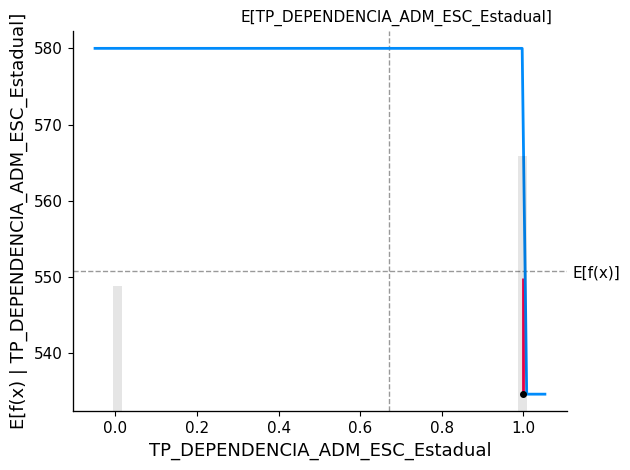

In [76]:
# Gera o gráfico PDP com SHAP sobreposto
fig, ax = shap.partial_dependence_plot(
    "TP_DEPENDENCIA_ADM_ESC_Estadual",                             # <- Substitua por qualquer feature relevante
    melhor_modelo_xgb.predict,
    X_test,
    model_expected_value=True,
    feature_expected_value=True,
    ice=False,
    show=False,
    shap_values=shap_values[sample_ind:sample_ind+1, :]
)

plt.tight_layout()
plt.show()
plt.savefig("imagens/DEP_ADM_PLOT.png", dpi=300, bbox_inches="tight")
plt.close()

In [77]:
# Gera o gráfico scatter para a variável 'IDHM'
shap.plots.scatter(shap_values[:, "IDHM"], show = False)
plt.savefig("imagens/scatter_IDHM_plot.png", dpi=300, bbox_inches="tight")
plt.close()

In [78]:

# Gera o gráfico scatter para a variável 'IDHM'
shap.plots.scatter(shap_values[:, "TP_DEPENDENCIA_ADM_ESC_Estadual"], show = False)
plt.savefig("imagens/TP_ADM_plot.png", dpi=300, bbox_inches="tight")
plt.close()

In [79]:
X_samp = X_GO.sample(frac=0.1)
y_samp = y_GO.loc[X_samp.index]
clustering = shap.utils.hclust(X_samp, y_samp)
shap.plots.bar(shap_values, clustering=clustering, clustering_cutoff=0.7, show=False)
plt.savefig("imagens/cluster_plot.png", dpi=300, bbox_inches="tight")
plt.close()

In [80]:
shap.plots.partial_dependence

<function shap.plots._partial_dependence.partial_dependence(ind, model, data, xmin='percentile(0)', xmax='percentile(100)', npoints=None, feature_names=None, hist=True, model_expected_value=False, feature_expected_value=False, shap_values=None, ylabel=None, ice=True, ace_opacity=1, pd_opacity=1, pd_linewidth=2, ace_linewidth='auto', ax=None, show=True)>

Partial dependence plots

In [81]:
shap.plots.partial_dependence(
"IDHM", melhor_modelo_xgb.predict, X_test, 
ice=False, model_expected_value=True, feature_expected_value=True, show=False)
plt.savefig("imagens/dependence_IDHM_plot.png", dpi=300, bbox_inches="tight")
plt.close()

In [82]:
shap.plots.partial_dependence(
"TP_DEPENDENCIA_ADM_ESC_Estadual", melhor_modelo_xgb.predict, X_test, 
ice=False, model_expected_value=True, feature_expected_value=True, show=False)
plt.savefig("imagens/Dependente_plot_2.png", dpi=300, bbox_inches="tight")
plt.close()

In [83]:
shap.summary_plot(
    shap_values[:1000, :],
    X_GO.iloc[:1000, :],
    plot_type="layered_violin",
    color="coolwarm",
    show=False)
plt.savefig("imagens/violin_plot.png", dpi=300, bbox_inches="tight")
plt.close()

In [84]:
arquivo_joblib_xgb = "modelo_treinado_joblib.sav"
joblib.dump(melhor_modelo_xgb, arquivo_joblib_xgb)

['modelo_treinado_joblib.sav']